In [33]:
import pandas as pd
import numpy as np
# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

In [34]:
# Read in data into a dataframe 
data = pd.read_csv("cleaned_data.csv")

# Display top of dataframe
data.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,NaN,NaN,NaN,NaN,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,NaN,NaN,NaN,51550675.1,NaN,NaN,38139374.2,11082770.5,6962.2,0.0,6962.2,762051.0,NaN,NaN,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,NaN,NaN,NaN,NaN,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,NaN,19624847.2,NaN,NaN,NaN,-391414802.6,933073441.0,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181.0,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,NaN,NaN,NaN,NaN,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,NaN,NaN,NaN,NaN,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,10032,193,FT WASHINGTON AVENUE,Manhattan,2114

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11319 entries, 12 to 11745
Data columns (total 49 columns):
Order                                                         11319 non-null int64
Property Id                                                   11319 non-null int64
Property Name                                                 11319 non-null object
Parent Property Id                                            11319 non-null object
Parent Property Name                                          11319 non-null object
BBL - 10 digits                                               11310 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11310 non-null object
NYC Building Identification Number (BIN)                      11173 non-null object
Address 1 (self-reported)                                     11319 non-null object
Postal Code                                                   11319 non-null object
Street Number                                       

In [48]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [49]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11319.000000,1.131900e+04,1.123700e+04,1.131900e+04,11319.000000,11319.000000,11319.000000,9461.000000,11319.000000,10052.000000,10716.000000,9565.000000,10052.000000,1.006400e+04,9.565000e+03,1.123300e+04,1.071600e+04,11316.000000,11302.000000,11308.000000,1.131900e+04,7.573000e+03,7573.000000,11319.000000,9184.000000,9184.000000,9184.000000,9184.000000,9184.000000
mean,7245.695026,3.638122e+06,1.653285e+05,1.571603e+05,1948.541832,1.281032,98.792296,60.749075,79.086377,82.859710,7.170586,0.463471,138.452467,6.319034e+06,6.748162e+04,4.896294e+06,1.446365e+06,946.171704,407.784189,539.285780,1.637925e+05,1.488663e+04,119.022420,134.188391,40.754453,-73.957023,7.151895,15.793554,4904.651459
std,4274.572157,1.042295e+06,3.087121e+05,2.869596e+05,30.518932,4.006103,7.359095,29.403223,33.317277,34.505509,5.511668,0.352911,63.591990,1.849371e+07,1.899877e+05,1.247223e+07,3.700087e+06,1995.343381,1003.798925,1584.108834,2.966000e+05,1.468339e+05,1343.759082,63.058632,0.080161,0.045690,3.955198,15.675889,13091.383118
min,15.000000,7.365000e+03,5.002800e+04,3.800000e+03,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3521.500000,2.745647e+06,6.504800e+04,6.532700e+04,1927.000000,1.000000,100.000000,38.000000,61.200000,64.700000,3.800000,0.100000,102.775000,1.053560e+06,1.136730e+04,1.036544e+06,2.999325e+05,329.000000,153.325000,95.400000,6.700000e+04,2.589000e+03,27.030000,98.600000,40.706860,-73.984616,4.000000,4.000000,100.000000
50%,7050.000000,3.211711e+06,9.240600e+04,9.114000e+04,1940.000000,1.000000,100.000000,66.000000,77.800000,81.700000,5.250000,0.500000,128.300000,4.045754e+06,4.397820e+04,1.817050e+06,5.302523e+05,495.700000,272.700000,170.350000,9.396400e+04,4.665700e+03,44.860000,123.600000,40.759116,-73.962881,7.000000,9.000000,201.000000
75%,11066.500000,4.408624e+06,1.568400e+05,1.522270e+05,1965.000000,1.000000,100.000000,86.000000,95.800000,100.800000,8.800000,0.700000,163.700000,6.707841e+06,7.218540e+04,4.176568e+06,1.223933e+06,868.825000,441.575000,409.825000,1.575000e+05,7.941300e+03,70.250000,158.550000,40.818733,-73.932036,9.000000,33.000000,530.000000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,2019.000000,161.000000,100.000000,100.000000,204.800000,219.500000,53.400000,1.900000,576.800000,1.048344e+09,1.048344e+07,3.815670e+08,1.109167e+08,73694.900000,63451.100000,39082.500000,1.421712e+07,6.594604e+06,84383.930000,577.900000,40.912869,-73.740543,56.000000,51.000000,117602.000000


In [50]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [51]:
missing_values_table(data)

Your selected dataframe has 49 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4379,38.7
Water Intensity (All Water Sources) (gal/ft²),3746,33.1
Water Use (All Water Sources) (kgal),3746,33.1
NTA,2135,18.9
Census Tract,2135,18.9
Council District,2135,18.9
Community Board,2135,18.9
Longitude,2135,18.9
Latitude,2135,18.9
score,1858,16.4


In [52]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 49 columns.
There are 31 columns that have missing values.
We will remove 0 columns.


In [53]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

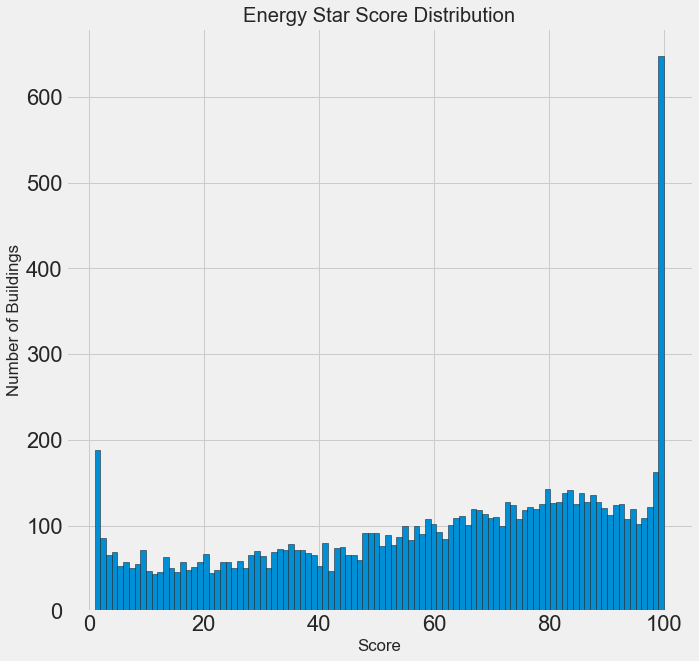

In [54]:
#figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

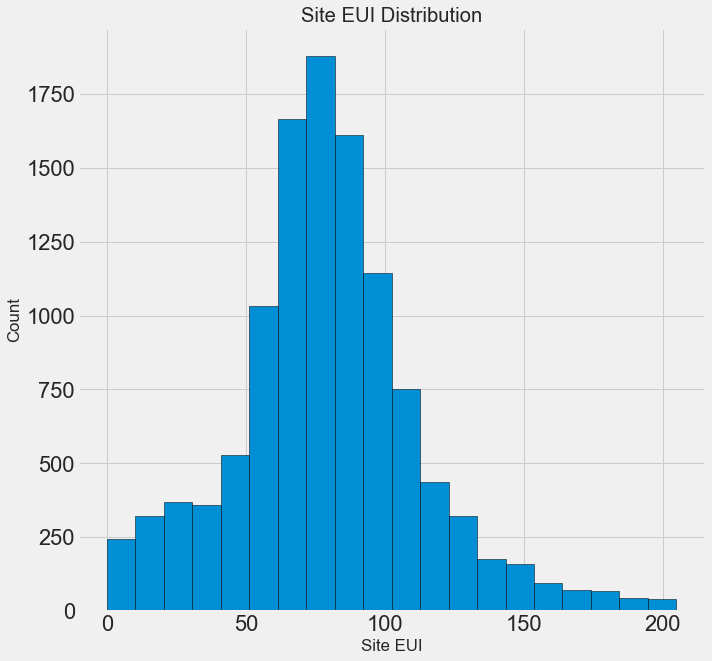

In [55]:
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [56]:
data['Site EUI (kBtu/ft²)'].describe()

count    11319.000000
mean        79.086377
std         33.317277
min          0.000000
25%         61.200000
50%         77.800000
75%         95.800000
max        204.800000
Name: Site EUI (kBtu/ft²), dtype: float64

In [57]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA


In [58]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

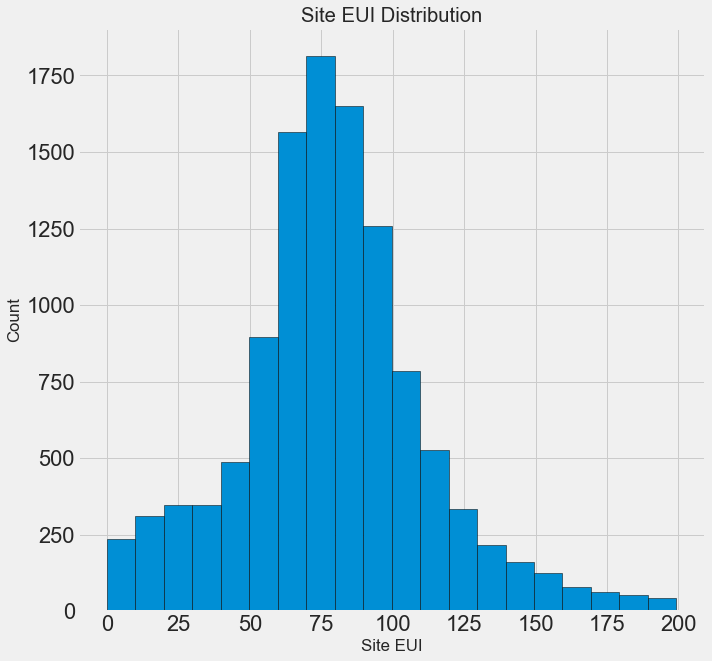

In [59]:
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [60]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

/Users/David/miniconda3/envs/MrLapin/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


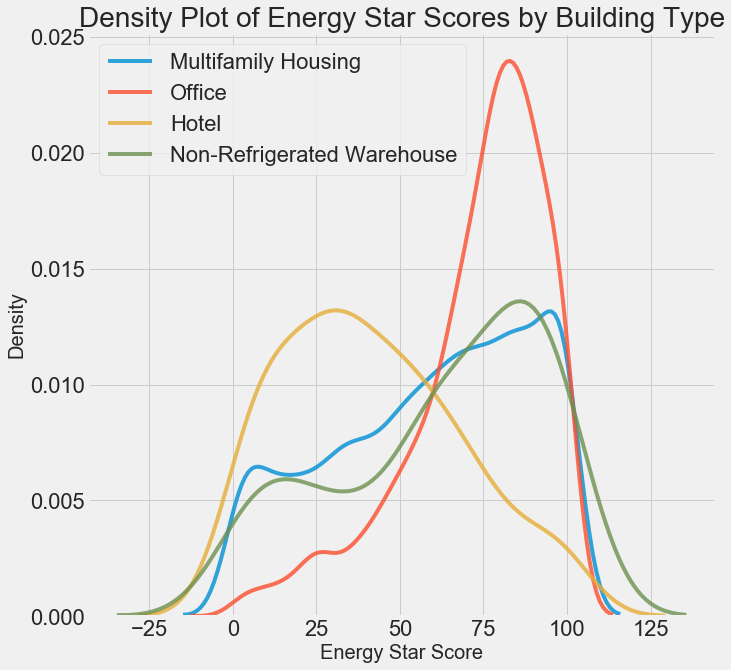

In [61]:
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
figsize(10,10)


# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

/Users/David/miniconda3/envs/MrLapin/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


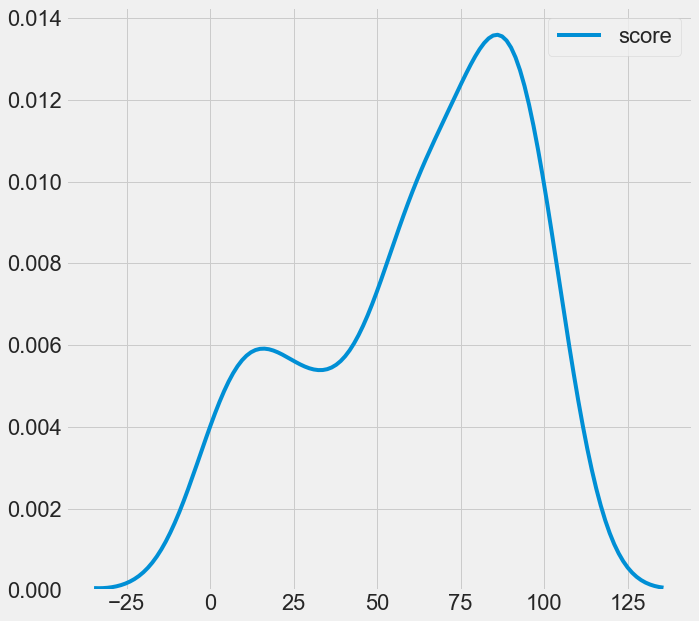

In [62]:
sn = sns.kdeplot(subset['score'].dropna());

In [63]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.725004
Weather Normalized Site EUI (kBtu/ft²)                       -0.715050
Weather Normalized Source EUI (kBtu/ft²)                     -0.648714
Source EUI (kBtu/ft²)                                        -0.643767
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358229
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.345605
Direct GHG Emissions (Metric Tons CO2e)                      -0.145514
Weather Normalized Site Natural Gas Use (therms)             -0.134071
Natural Gas Use (kBtu)                                       -0.132596
Year Built                                                   -0.121921
Total GHG Emissions (Metric Tons CO2e)                       -0.111406
Electricity Use - Grid Purchase (kBtu)                       -0.049812
Latitude                                                     -0.048575
Weather Normalized Site Electricity (kWh)                    -0.047389
Proper

In [64]:
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

In [65]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

In [66]:
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

In [67]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                          -0.725004
Weather Normalized Site EUI (kBtu/ft²)                       -0.715050
Weather Normalized Source EUI (kBtu/ft²)                     -0.648714
Source EUI (kBtu/ft²)                                        -0.643767
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358229
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.345605
Direct GHG Emissions (Metric Tons CO2e)                      -0.145514
Weather Normalized Site Natural Gas Use (therms)             -0.134071
Natural Gas Use (kBtu)                                       -0.132596
Year Built                                                   -0.121921
Total GHG Emissions (Metric Tons CO2e)                       -0.111406
Largest Property Use Type_Multifamily Housing                -0.101299
Largest Property Use Type_Hotel                              -0.097180
Largest Property Use Type_Senior Care Community              -0.054988
Electr

In [68]:
# Display most positive correlations
correlations.tail(15)

Largest Property Use Type_Courthouse                               0.016449
Largest Property Use Type_Financial Office                         0.017121
Property GFA - Self-Reported (ft²)                                 0.017656
Largest Property Use Type - Gross Floor Area (ft²)                 0.018672
Largest Property Use Type_Retail Store                             0.024862
Largest Property Use Type_Supermarket/Grocery Store                0.030925
Borough_Queens                                                     0.031506
Largest Property Use Type_Residence Hall/Dormitory                 0.035227
Order                                                              0.037741
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048431
Borough_Brooklyn                                                   0.049792
Community Board                                                    0.056719
Council District                                                   0.061238
Largest Prop

/Users/David/miniconda3/envs/MrLapin/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/Users/David/miniconda3/envs/MrLapin/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


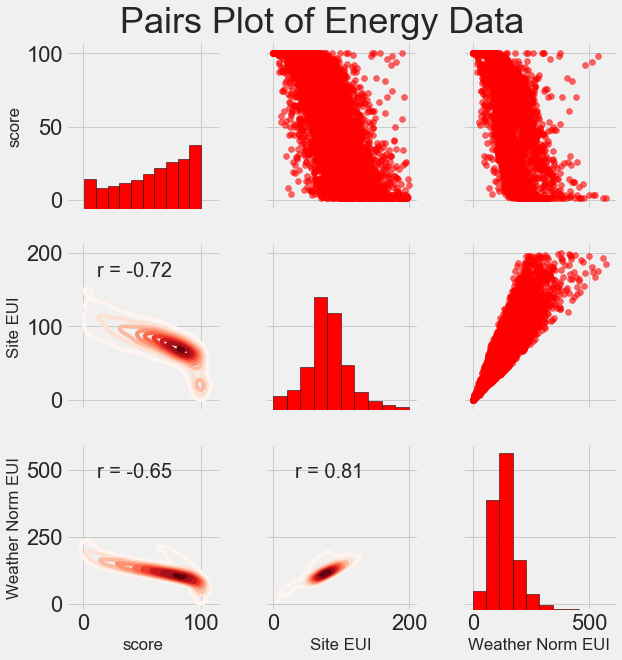

In [69]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

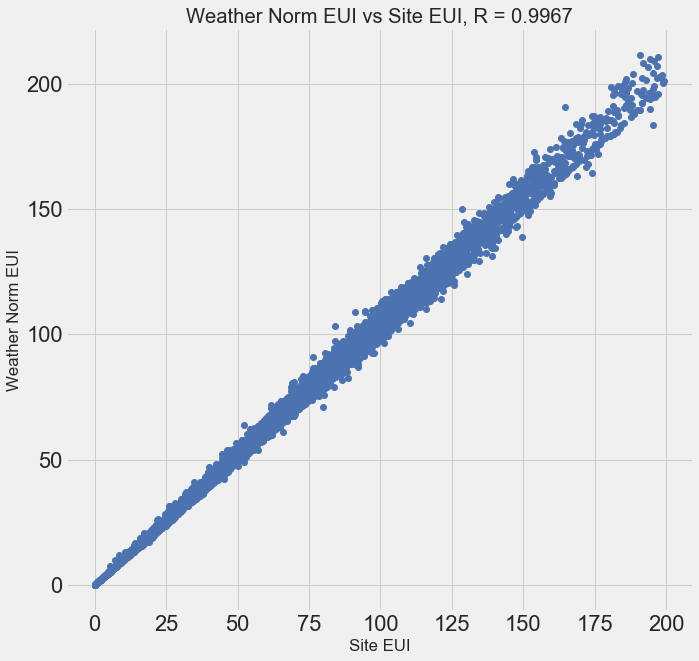

In [70]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [71]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [72]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

In [73]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(9444, 65)

In [74]:
#Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 65)
(9444, 65)


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6610, 64)
(2834, 64)
(6610, 1)
(2834, 1)


## Decion Tree Regressor

In [79]:
from sklearn.preprocessing import Imputer, MinMaxScaler

from sklearn.tree import DecisionTreeRegressor

In [80]:
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(X)

# Transform both training data and testing data
X1 = imputer.transform(X)
X1_test = imputer.transform(X_test)

In [81]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X1)

# Transform both the training and testing data
X = scaler.transform(X1)
X_test = scaler.transform(X1_test)

In [82]:
# Convert y to one-dimensional array (vector)
y1 = np.array(y).reshape((-1, ))
y1_test = np.array(y_test).reshape((-1, ))

In [85]:
model = DecisionTreeRegressor()
model.fit(X1, y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [86]:
predictions = model.predict(X1_test)
model.fit(X1, y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [87]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [90]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y1 = regr_1.predict(X_test)
y2 = regr_2.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 64 and input n_features is 1 

ValueError: x and y must be the same size

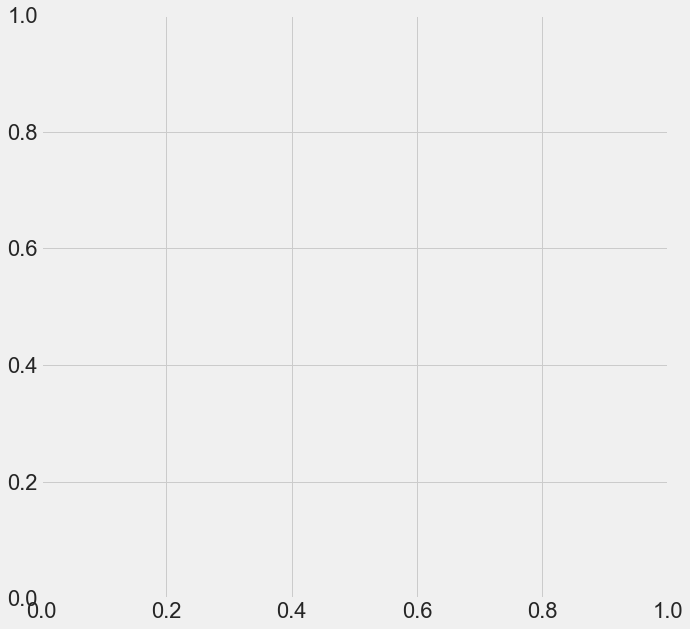

In [91]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [93]:
X_Test.shape()

NameError: name 'X_Test' is not defined